In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers.convolutional import ZeroPadding2D
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, BatchNormalization
from keras.layers import Activation, Dropout, Flatten, Dense, Input
import keras
from keras import backend as K
from keras.optimizers import SGD
import os
import h5py
import tensorflow as tf
import matplotlib.pyplot as plt

d:\softwares\anaconda\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto()
print(config)
#config.gpu_options.per_process_gpu_memory_fraction = 0.5
set_session(tf.Session(config=config))

In [2]:
img_width, img_height = 150,150

In [3]:
train_data_dir = 'dataNew\\train'
validation_data_dir = 'dataNew\\validation'
test_data_dir = 'dataNew\\test'
nb_train_samples = 16000
nb_test_samples = 4000
nb_validation_samples = 3000
epochs = 50
batch_size = 32

In [4]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

# ResNet

In [5]:
modelResNet = Sequential()
input2 = Input(shape=input_shape)
n1 = Conv2D(64, (7,7),kernel_initializer='he_normal',activation='relu',padding='same', strides=(2,2))(input2)
n1 = MaxPooling2D(pool_size=(3,3),padding="same", strides=(2,2))(n1)
n2 = Conv2D(64, (3,3),kernel_initializer='he_normal', padding='same', activation='relu', strides=(1,1))(n1)
n3 = Conv2D(64, (3,3),kernel_initializer='he_normal', padding ="same", activation='relu', strides=(1,1))(n2)
n3 = keras.layers.Concatenate()([n1, n3])
n4 = Conv2D(64, (3,3),kernel_initializer='he_normal', padding ="same", activation='relu', strides=(1,1))(n3)
n5 = Conv2D(64, (3,3),kernel_initializer='he_normal', padding ="same", activation='relu', strides=(1,1))(n4)
n5 = keras.layers.Concatenate()([n4, n5])
n6 = Conv2D(64, (3,3),kernel_initializer='he_normal', padding ="same", activation='relu', strides=(1,1))(n5)
n7 = Conv2D(64, (3,3),kernel_initializer='he_normal', padding ="same", activation='relu', strides=(1,1))(n6)
n7 = keras.layers.Concatenate()([n5, n7])
n8 = Conv2D(128, (3,3),kernel_initializer='he_normal', padding ="same", activation='relu', strides=(1,1))(n7)
n9 = Conv2D(128, (3,3),kernel_initializer='he_normal', padding ="same", activation='relu', strides=(1,1))(n8)
n9 = keras.layers.Concatenate()([n7, n9])
n10 = Conv2D(128, (3,3),kernel_initializer='he_normal', padding ="same", activation='relu', strides=(1,1))(n9)
n11 = Conv2D(128, (3,3),kernel_initializer='he_normal', padding ="same", activation='relu', strides=(1,1))(n10)
n11 = keras.layers.Concatenate()([n9, n10])
n12 = Conv2D(128, (3,3),kernel_initializer='he_normal', padding ="same", activation='relu', strides=(1,1))(n11)
n13 = Conv2D(128, (3,3),kernel_initializer='he_normal', padding ="same", activation='relu', strides=(1,1))(n12)
n13 = keras.layers.Concatenate()([n11, n13])
n14 = Conv2D(128, (3,3),kernel_initializer='he_normal', padding ="same", activation='relu', strides=(1,1))(n13)
n15 = Conv2D(128, (3,3),kernel_initializer='he_normal', padding ="same", activation='relu', strides=(1,1))(n14)
n15 = keras.layers.Concatenate()([n13, n15])
inc = Conv2D(256, (1,1),kernel_initializer='he_normal', padding ="same", activation='relu', strides=(2,2))(n7)
n16 = Conv2D(256, (3,3),kernel_initializer='he_normal', padding ="same", activation='relu', strides=(2,2))(n15)
n17 = Conv2D(256, (3,3),kernel_initializer='he_normal', padding ="same", activation='relu', strides=(1,1))(n16)
n17 = keras.layers.Concatenate()([inc, n17])
n18 = Conv2D(256, (3,3),kernel_initializer='he_normal', padding ="same", activation='relu', strides=(1,1))(n17)
n19 = Conv2D(256, (3,3),kernel_initializer='he_normal', padding ="same", activation='relu', strides=(1,1))(n18)
n19 = keras.layers.Concatenate()([n17, n19])
n20 = Conv2D(256, (3,3),kernel_initializer='he_normal', padding ="same", activation='relu', strides=(1,1))(n19)
n21 = Conv2D(256, (3,3),kernel_initializer='he_normal', padding ="same", activation='relu', strides=(1,1))(n20)
n21 = keras.layers.Concatenate()([n19, n21])
n22 = Conv2D(256, (3,3),kernel_initializer='he_normal', padding ="same", activation='relu', strides=(1,1))(n21)
n23 = Conv2D(256, (3,3),kernel_initializer='he_normal', padding ="same", activation='relu', strides=(1,1))(n22)
n23 = keras.layers.Concatenate()([n21, n23])
n24 = Conv2D(256, (3,3),kernel_initializer='he_normal', padding ="same", activation='relu', strides=(1,1))(n23)
n25 = Conv2D(256, (3,3),kernel_initializer='he_normal', padding ="same", activation='relu', strides=(1,1))(n24)
n25 = keras.layers.Concatenate()([n23, n25])
n26 = Conv2D(256, (3,3),kernel_initializer='he_normal', padding ="same", activation='relu', strides=(1,1))(n25)
n27 = Conv2D(256, (3,3),kernel_initializer='he_normal', padding ="same", activation='relu', strides=(1,1))(n26)
n27 = keras.layers.Concatenate()([n25, n27])
inc = Conv2D(512, (1,1),kernel_initializer='he_normal', padding ="same", activation='relu', strides=(1,1))(n27)
n28 = Conv2D(512, (3,3),kernel_initializer='he_normal', padding ="same", activation='relu', strides=(1,1))(inc)
n29 = Conv2D(512, (3,3),kernel_initializer='he_normal', padding ="same", activation='relu', strides=(1,1))(n28)
n29 = keras.layers.Concatenate()([inc, n29])
n30 = Conv2D(512, (3,3),kernel_initializer='he_normal', padding ="same", activation='relu', strides=(1,1))(n29)
n31 = Conv2D(512, (3,3),kernel_initializer='he_normal', padding ="same", activation='relu', strides=(1,1))(n30)
n31 = keras.layers.Concatenate()([n29,n31])
n32 = Conv2D(512, (3,3),kernel_initializer='he_normal', padding ="same", activation='relu', strides=(1,1))(n31)
n33 = Conv2D(512, (3,3),kernel_initializer='he_normal', padding ="same", activation='relu', strides=(1,1))(n32)
n33 = keras.layers.Concatenate()([n31, n33])
n34 = AveragePooling2D(pool_size=(3, 3))(n33)
n34 = Flatten()(n33)
n34 = Dense(2, activation = 'softmax')(n34) 

modelResNet = Model(inputs = input2, outputs = n34)
modelResNet.summary()


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 150, 150, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 75, 75, 64)   9472        input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 38, 38, 64)   0           conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 38, 38, 64)   36928       max_pooling2d_1[0][0]            
__________________________________________________________________________________________________
conv2d_3 (

# AlexNet

In [6]:
modelAlexNet = Sequential()

modelAlexNet.add(Conv2D(96, (11,11),kernel_initializer='he_normal',activation='relu', strides=(4,4),input_shape=input_shape))
modelAlexNet.add(MaxPooling2D(pool_size=(3, 3), strides=(2,2)))
modelAlexNet.add(BatchNormalization())

modelAlexNet.add(Conv2D(256, (5,5),kernel_initializer='he_normal',padding='same',activation='relu',strides=(1,1)))
modelAlexNet.add(MaxPooling2D(pool_size=(3, 3), strides=(2,2)))

modelAlexNet.add(BatchNormalization())


modelAlexNet.add(Conv2D(384, (3,3),kernel_initializer='he_normal',padding='same',activation='relu', strides=(1,1)))
modelAlexNet.add(Conv2D(384, (3,3),kernel_initializer='he_normal',padding='same',activation='relu', strides=(1,1)))
modelAlexNet.add(Conv2D(256, (3,3),kernel_initializer='he_normal',padding='same',activation='relu',strides=(1,1)))

modelAlexNet.add(MaxPooling2D(pool_size=(3, 3), strides=(2,2)))


modelAlexNet.add(Flatten())
modelAlexNet.add(Dense(4096,activation='relu'))
modelAlexNet.add(Activation('relu'))
modelAlexNet.add(Dropout(0.5))
modelAlexNet.add(Dense(4096,activation='relu'))
modelAlexNet.add(Activation('relu'))
modelAlexNet.add(Dropout(0.5))
modelAlexNet.add(Dense(2,activation='softmax'))
modelAlexNet.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 35, 35, 96)        34944     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 17, 17, 96)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 17, 17, 96)        384       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 17, 17, 256)       614656    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 256)         0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 8, 8, 256)         1024      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 384)         885120    
__________

# VGGNet

In [6]:
modelVgg = Sequential()
modelVgg.add(Conv2D(64, (3, 3),activation='relu',padding='same', strides = (1,1), input_shape=input_shape))
modelVgg.add(MaxPooling2D(pool_size=(2, 2)))
modelVgg.add(BatchNormalization())


modelVgg.add(Conv2D(128, (3, 3),activation='relu', padding = 'same', strides = (1,1)))
modelVgg.add(MaxPooling2D(pool_size=(2, 2)))
modelVgg.add(BatchNormalization())


modelVgg.add(Conv2D(256, (3, 3),activation='relu',padding = 'same',strides = (1,1)))
modelVgg.add(Conv2D(256, (3, 3),activation='relu',padding = 'same',strides = (1,1)))
modelVgg.add(MaxPooling2D(pool_size=(2, 2)))
modelVgg.add(BatchNormalization())


modelVgg.add(Conv2D(512, (3, 3),activation='relu', padding = 'same',strides = (1,1)))
modelVgg.add(Conv2D(512, (3, 3),activation='relu', padding = 'same',strides = (1,1)))
modelVgg.add(MaxPooling2D(pool_size=(2, 2)))

modelVgg.add(Conv2D(512, (3, 3),activation='relu', padding = 'same',strides = (1,1)))
modelVgg.add(Conv2D(512, (3, 3),activation='relu', padding = 'same',strides = (1,1)))
modelVgg.add(MaxPooling2D(pool_size=(2, 2)))



modelVgg.add(Flatten())
modelVgg.add(Dense(4096, activation='relu'))
modelVgg.add(Activation('relu'))
modelVgg.add(Dropout(0.5))
modelVgg.add(Dense(4096, activation='relu'))
modelVgg.add(Activation('relu'))
modelVgg.add(Dropout(0.5))
modelVgg.add(Dense(2, activation='softmax'))
modelVgg.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 150, 150, 64)      1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 75, 75, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 37, 37, 128)       0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 37, 37, 128)       512       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 37, 37, 256)       295168    
__________

In [12]:
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

modelResNet.compile(loss='mse',
              optimizer=sgd,
              metrics=['accuracy'])


train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)


In [7]:
sgd = SGD(lr=0.01, decay=1e-5, momentum=0.9, nesterov=True)

modelVgg.compile(loss='mse',
              optimizer=sgd,
              metrics=['accuracy'])


train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)


In [7]:
sgd = SGD(lr=0.01, decay=5e-4, momentum=0.9, nesterov=True)

modelAlexNet.compile(loss='mse',
              optimizer=sgd,
              metrics=['accuracy'])


train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [13]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 15000 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.


In [8]:
print(validation_generator.class_indices)222

{'dogs': 1, 'cats': 0}


In [8]:

resNetHistory = modelResNet.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/50
500/500 [==============================] - 348s 695ms/step - loss: 0.2406 - acc: 0.5870 - val_loss: 0.2114 - val_acc: 0.6599
Epoch 2/50
500/500 [==============================] - 331s 662ms/step - loss: 0.2044 - acc: 0.6803 - val_loss: 0.1896 - val_acc: 0.7134
Epoch 3/50
500/500 [==============================] - 332s 664ms/step - loss: 0.1810 - acc: 0.7300 - val_loss: 0.1518 - val_acc: 0.7776
Epoch 4/50
500/500 [==============================] - 332s 664ms/step - loss: 0.1584 - acc: 0.7687 - val_loss: 0.1503 - val_acc: 0.7866
Epoch 5/50
500/500 [==============================] - 334s 668ms/step - loss: 0.1413 - acc: 0.7971 - val_loss: 0.1484 - val_acc: 0.7917
Epoch 6/50
500/500 [==============================] - 333s 665ms/step - loss: 0.1254 - acc: 0.8234 - val_loss: 0.1258 - val_acc: 0.8233
Epoch 7/50
500/500 [==============================] - 333s 665ms/step - loss: 0.1113 - acc: 0.8453 - val_loss: 0.1190 - val_acc: 0.8317
Epoch 8/50
500/500 [============================

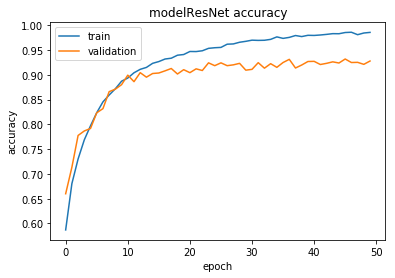

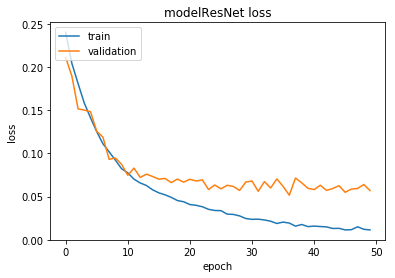

In [9]:
plt.plot(resNetHistory.history['acc'])
plt.plot(resNetHistory.history['val_acc'])
plt.title('modelResNet accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(resNetHistory.history['loss'])
plt.plot(resNetHistory.history['val_loss'])
plt.title('modelResNet loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [8]:
#batch_size=32

historyResNet = modelResNet.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/20
500/500 [==============================] - 559s 1s/step - loss: 0.2352 - acc: 0.6043 - val_loss: 0.2122 - val_acc: 0.6549
Epoch 2/20
500/500 [==============================] - 506s 1s/step - loss: 0.2001 - acc: 0.6881 - val_loss: 0.1754 - val_acc: 0.7497
Epoch 3/20
500/500 [==============================] - 512s 1s/step - loss: 0.1757 - acc: 0.7375 - val_loss: 0.1610 - val_acc: 0.7624
Epoch 4/20
500/500 [==============================] - 513s 1s/step - loss: 0.1567 - acc: 0.7708 - val_loss: 0.1408 - val_acc: 0.8034
Epoch 5/20
500/500 [==============================] - 513s 1s/step - loss: 0.1388 - acc: 0.7999 - val_loss: 0.1443 - val_acc: 0.7876
Epoch 6/20
500/500 [==============================] - 498s 997ms/step - loss: 0.1255 - acc: 0.8193 - val_loss: 0.1290 - val_acc: 0.8098
Epoch 7/20
500/500 [==============================] - 497s 994ms/step - loss: 0.1118 - acc: 0.8431 - val_loss: 0.1112 - val_acc: 0.8498
Epoch 8/20
500/500 [==============================] - 499s 998m

In [9]:
#batch_size=32

historyResNet = modelResNet.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/20
500/500 [==============================] - 619s 1s/step - loss: 0.4997 - acc: 0.4998 - val_loss: 0.5003 - val_acc: 0.4997
Epoch 2/20
500/500 [==============================] - 604s 1s/step - loss: 0.4007 - acc: 0.5123 - val_loss: 0.2496 - val_acc: 0.4997
Epoch 3/20
500/500 [==============================] - 509s 1s/step - loss: 0.2362 - acc: 0.5916 - val_loss: 0.2066 - val_acc: 0.6714
Epoch 4/20
500/500 [==============================] - 522s 1s/step - loss: 0.2040 - acc: 0.6821 - val_loss: 0.1755 - val_acc: 0.7406
Epoch 5/20
500/500 [==============================] - 522s 1s/step - loss: 0.1820 - acc: 0.7268 - val_loss: 0.1597 - val_acc: 0.7685
Epoch 6/20
500/500 [==============================] - 523s 1s/step - loss: 0.1667 - acc: 0.7563 - val_loss: 0.1490 - val_acc: 0.7876
Epoch 7/20
500/500 [==============================] - 522s 1s/step - loss: 0.1462 - acc: 0.7885 - val_loss: 0.1511 - val_acc: 0.7782
Epoch 8/20
500/500 [==============================] - 522s 1s/step - 

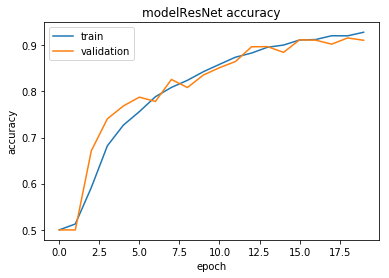

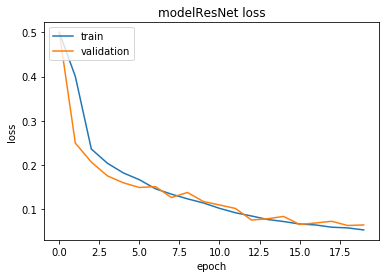

In [10]:
#print(historyAlexNet.history.keys())
plt.plot(historyResNet.history['acc'])
plt.plot(historyResNet.history['val_acc'])
plt.title('modelResNet accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(historyResNet.history['loss'])
plt.plot(historyResNet.history['val_loss'])
plt.title('modelResNet loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [8]:
#batch_size=128   train 16000 validation = 4000
modelAlexNet.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/50
125/125 [==============================] - 150s 1s/step - loss: 0.2397 - acc: 0.6299 - val_loss: 0.2265 - val_acc: 0.6469
Epoch 2/50
125/125 [==============================] - 121s 971ms/step - loss: 0.1723 - acc: 0.7427 - val_loss: 0.2933 - val_acc: 0.5890
Epoch 3/50
125/125 [==============================] - 122s 977ms/step - loss: 0.1481 - acc: 0.7857 - val_loss: 0.1979 - val_acc: 0.6875
Epoch 4/50
125/125 [==============================] - 122s 973ms/step - loss: 0.1325 - acc: 0.8121 - val_loss: 0.1641 - val_acc: 0.7545
Epoch 5/50
125/125 [==============================] - 122s 976ms/step - loss: 0.1229 - acc: 0.8239 - val_loss: 0.1435 - val_acc: 0.7903
Epoch 6/50
125/125 [==============================] - 125s 998ms/step - loss: 0.1155 - acc: 0.8364 - val_loss: 0.1255 - val_acc: 0.8170
Epoch 7/50
125/125 [==============================] - 121s 972ms/step - loss: 0.1085 - acc: 0.8468 - val_loss: 0.1229 - val_acc: 0.8284
Epoch 8/50
125/125 [==============================]

In [9]:
#batch_size=128   train 16000 validation = 4000

historyAlexNet = modelAlexNet.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=80,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/80
125/125 [==============================] - 118s 941ms/step - loss: 0.2787 - acc: 0.5982 - val_loss: 0.2469 - val_acc: 0.6009
Epoch 2/80
125/125 [==============================] - 98s 786ms/step - loss: 0.1881 - acc: 0.7186 - val_loss: 0.2685 - val_acc: 0.5815
Epoch 3/80
125/125 [==============================] - 97s 778ms/step - loss: 0.1561 - acc: 0.7745 - val_loss: 0.1538 - val_acc: 0.7772
Epoch 4/80
125/125 [==============================] - 99s 793ms/step - loss: 0.1417 - acc: 0.7975 - val_loss: 0.2070 - val_acc: 0.7048
Epoch 5/80
125/125 [==============================] - 98s 786ms/step - loss: 0.1282 - acc: 0.8191 - val_loss: 0.1442 - val_acc: 0.7901
Epoch 6/80
125/125 [==============================] - 97s 775ms/step - loss: 0.1154 - acc: 0.8403 - val_loss: 0.1928 - val_acc: 0.7181
Epoch 7/80
125/125 [==============================] - 97s 775ms/step - loss: 0.1112 - acc: 0.8441 - val_loss: 0.1466 - val_acc: 0.7921
Epoch 8/80
125/125 [==============================] - 

Epoch 60/80
125/125 [==============================] - 117s 938ms/step - loss: 0.0132 - acc: 0.9843 - val_loss: 0.0981 - val_acc: 0.8764
Epoch 61/80
125/125 [==============================] - 118s 945ms/step - loss: 0.0136 - acc: 0.9837 - val_loss: 0.0988 - val_acc: 0.8753
Epoch 62/80
125/125 [==============================] - 136s 1s/step - loss: 0.0124 - acc: 0.9852 - val_loss: 0.0968 - val_acc: 0.8808
Epoch 63/80
125/125 [==============================] - 126s 1s/step - loss: 0.0117 - acc: 0.9864 - val_loss: 0.1102 - val_acc: 0.8624
Epoch 64/80
125/125 [==============================] - 133s 1s/step - loss: 0.0116 - acc: 0.9854 - val_loss: 0.0987 - val_acc: 0.8781
Epoch 65/80
125/125 [==============================] - 135s 1s/step - loss: 0.0115 - acc: 0.9859 - val_loss: 0.1022 - val_acc: 0.8709
Epoch 66/80
125/125 [==============================] - 120s 958ms/step - loss: 0.0109 - acc: 0.9862 - val_loss: 0.0974 - val_acc: 0.8781
Epoch 67/80
125/125 [==============================] 

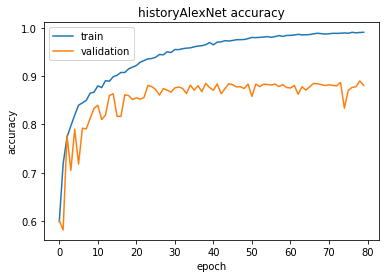

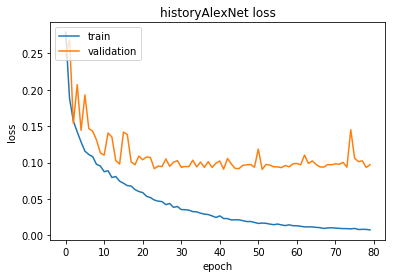

In [10]:
plt.plot(historyAlexNet.history['acc'])
plt.plot(historyAlexNet.history['val_acc'])
plt.title('historyAlexNet accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(historyAlexNet.history['loss'])
plt.plot(historyAlexNet.history['val_loss'])
plt.title('historyAlexNet loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [8]:
modelVgg.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/50
250/250 [==============================] - 165s 660ms/step - loss: 0.2187 - acc: 0.6470 - val_loss: 0.2410 - val_acc: 0.6159
Epoch 2/50
250/250 [==============================] - 153s 610ms/step - loss: 0.1696 - acc: 0.7478 - val_loss: 0.2629 - val_acc: 0.6033
Epoch 3/50
250/250 [==============================] - 153s 613ms/step - loss: 0.1366 - acc: 0.8019 - val_loss: 0.1862 - val_acc: 0.7150
Epoch 4/50
250/250 [==============================] - 151s 605ms/step - loss: 0.1106 - acc: 0.8438 - val_loss: 0.1118 - val_acc: 0.8453
Epoch 5/50
250/250 [==============================] - 151s 603ms/step - loss: 0.0935 - acc: 0.8696 - val_loss: 0.1262 - val_acc: 0.8228
Epoch 6/50
250/250 [==============================] - 151s 602ms/step - loss: 0.0801 - acc: 0.8894 - val_loss: 0.1780 - val_acc: 0.7707
Epoch 7/50
250/250 [==============================] - 152s 608ms/step - loss: 0.0699 - acc: 0.9043 - val_loss: 0.0903 - val_acc: 0.8770
Epoch 8/50
250/250 [============================

In [9]:
historyVGGNet = modelVgg.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=80,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/80
250/250 [==============================] - 132s 528ms/step - loss: 0.2177 - acc: 0.6518 - val_loss: 0.1997 - val_acc: 0.6831
Epoch 2/80
250/250 [==============================] - 130s 518ms/step - loss: 0.1717 - acc: 0.7439 - val_loss: 0.3162 - val_acc: 0.5642
Epoch 3/80
250/250 [==============================] - 146s 584ms/step - loss: 0.1370 - acc: 0.8036 - val_loss: 0.1897 - val_acc: 0.7021
Epoch 4/80
250/250 [==============================] - 147s 587ms/step - loss: 0.1159 - acc: 0.8356 - val_loss: 0.2048 - val_acc: 0.7062
Epoch 5/80
250/250 [==============================] - 152s 608ms/step - loss: 0.0979 - acc: 0.8641 - val_loss: 0.1152 - val_acc: 0.8410
Epoch 6/80
250/250 [==============================] - 145s 580ms/step - loss: 0.0831 - acc: 0.8840 - val_loss: 0.1326 - val_acc: 0.8135
Epoch 7/80
250/250 [==============================] - 145s 582ms/step - loss: 0.0731 - acc: 0.9003 - val_loss: 0.0916 - val_acc: 0.8767
Epoch 8/80
250/250 [============================

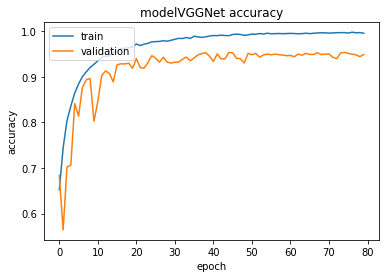

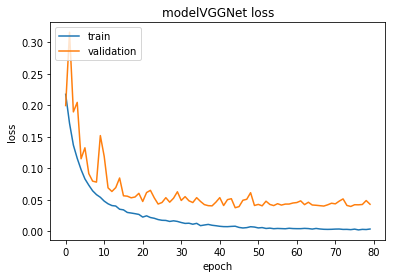

In [11]:
#print(historyAlexNet.history.keys())
plt.plot(historyVGGNet.history['acc'])
plt.plot(historyVGGNet.history['val_acc'])
plt.title('modelVGGNet accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(historyVGGNet.history['loss'])
plt.plot(historyVGGNet.history['val_loss'])
plt.title('modelVGGNet loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [10]:
modelVgg.save_weights('VggWeights.h5')

In [12]:
modelAlexNet.save_weights('AlexNetWeights.h5')

In [10]:
modelResNet.save_weights('ResNetWeights.h5')

In [8]:
modelAlexNet.load_weights('AlexNetWeights.h5')


# AlexNet Testing

In [11]:
sgd = SGD(lr=0.01, decay=5e-4, momentum=0.9, nesterov=True)

modelAlexNet.compile(loss='mse',
              optimizer=sgd,
              metrics=['accuracy'])

modelAlexNet.evaluate_generator(
    test_generator)

[0.08954800140857697, 0.89]


# VggNet Testing

In [22]:
modelVgg.load_weights('VggWeights.h5')

In [24]:

modelVgg.compile(loss='mse',
              optimizer=sgd,
              metrics=['accuracy'])


In [25]:
modelVgg.evaluate_generator(
    test_generator)

[0.04580857186516126, 0.9439999995231628]


# ResNet Testing

In [27]:
modelResNet.load_weights('ResNetWeights.h5')


In [28]:
modelResNet.compile(loss='mse',
              optimizer=sgd,
              metrics=['accuracy'])


In [11]:
modelResNet.evaluate_generator(
    test_generator)

[0.05036394803610165, 0.9375]